In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Dense, Input, LeakyReLU, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample
import matplotlib.pyplot as plt
import os


In [2]:

# Read the CSV file
df = pd.read_csv('diabetes_prediction_dataset.csv')
print(df.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


In [3]:
df_encoded = pd.get_dummies(df, columns=['gender', 'smoking_history'], drop_first=True)
print(df_encoded.head())

    age  hypertension  heart_disease    bmi  HbA1c_level  blood_glucose_level  \
0  80.0             0              1  25.19          6.6                  140   
1  54.0             0              0  27.32          6.6                   80   
2  28.0             0              0  27.32          5.7                  158   
3  36.0             0              0  23.45          5.0                  155   
4  76.0             1              1  20.14          4.8                  155   

   diabetes  gender_Male  gender_Other  smoking_history_current  \
0         0        False         False                    False   
1         0        False         False                    False   
2         0         True         False                    False   
3         0        False         False                     True   
4         0         True         False                     True   

   smoking_history_ever  smoking_history_former  smoking_history_never  \
0                 False             

In [ ]:
age_groups = [(0, 29), (30, 59), (60, 89)]

datasets = {}
for start, end in age_groups:
    group_name = f"{start}-{end}"
    datasets[group_name] = df_encoded[(df_encoded['age'] >= start) & (df_encoded['age'] <= end)]

# Display the number of records in each dataset
for group_name, dataset in datasets.items():
    print(f"Age group {group_name}: {len(dataset)} records")

Age group 0-29: 32435 records
Age group 30-59: 42510 records
Age group 60-89: 25055 records


In [5]:
testDF = datasets['60-89']

In [ ]:
# Separate age 79-80 group (overrepresented)
df_80 = testDF[(testDF['age'] == 80)]

# Separate other age groups (underrepresented)
df_underrepresented = testDF[(testDF['age'] != 80)]

# Downsample the 79-80 group to match the underrepresented groups
df_80_downsampled = resample(df_80, 
                                replace=False,    # sample without replacement
                                n_samples=1100,   # define desired sample size
                                random_state=42)  # reproducibility

# Optionally, you can oversample underrepresented groups
df_underrepresented_oversampled = resample(df_underrepresented, 
                                           replace=True,     # sample with replacement
                                           n_samples=20000,   # match overrepresented group size
                                           random_state=42)

# Combine the resampled datasets
df_resampled = pd.concat([df_80_downsampled, df_underrepresented_oversampled])

# Shuffle the combined dataset
df_resampled = df_resampled.sample(frac=1).reset_index(drop=True)

# Split into features and labels
X_unscaled = df_resampled.drop(['diabetes'], axis=1)  # Assuming 'diabetes' is the target
y = df_resampled['diabetes']

# Normalize the features
numerical_columns = X_unscaled.select_dtypes(include=np.number).columns
boolean_columns = X_unscaled.select_dtypes(include=bool).columns

scaler = StandardScaler()

df_numerical_scaled = pd.DataFrame(scaler.fit_transform(X_unscaled[numerical_columns]), columns=numerical_columns)

X_scaled = pd.concat([df_numerical_scaled, X_unscaled[boolean_columns]], axis=1)
# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("numerical cols: ", numerical_columns)
print("boolean cols: ", boolean_columns)

numerical cols:  Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level'],
      dtype='object')
boolean cols:  Index(['gender_Male', 'gender_Other', 'smoking_history_current',
       'smoking_history_ever', 'smoking_history_former',
       'smoking_history_never', 'smoking_history_not current'],
      dtype='object')


Model file does not exist. Training a new model...
Epoch 1/200
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 2.1732 - val_loss: 0.2056
Epoch 2/200
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2869 - val_loss: 0.1210
Epoch 3/200
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9983 - val_loss: 0.0908
Epoch 4/200
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8250 - val_loss: 0.0700
Epoch 5/200
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7046 - val_loss: 0.0584
Epoch 6/200
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6133 - val_loss: 0.0489
Epoch 7/200
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5389 - val_loss: 0.0425
Epoch 8/200
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4716 - val_loss: 0.0381
Epoch 9/200
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4187 - val_loss: 0.0340
Epoch 10/200
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3755 - val_loss: 0.0306
Epoch 11/200
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3373 - val_los

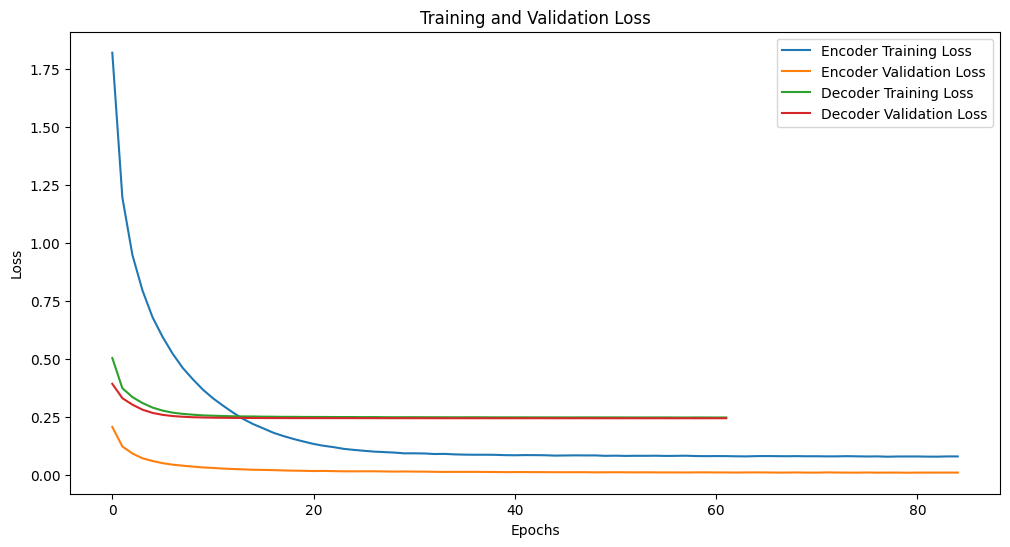

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Mean Reconstruction Error Percentage: 25.10%


In [7]:
# Filename for the autoencoder model
model_file = './models/autoencoderGroup3.keras'

# Check if the model file exists, load it if available, otherwise train a new model
if os.path.exists(model_file):
    print("Model file exists. Loading the model...")
    autoencoder = load_model(model_file)
else:
    print("Model file does not exist. Training a new model...")

    # Define input dimensions and encoding dimensions
    input_dim = x_train.shape[1]  # Assuming 12 features
    encoding_dim = 13  # Bottleneck layer dimension

    # Define the Encoder
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(256)(input_layer)
    encoded = LeakyReLU()(encoded)
    encoded = BatchNormalization()(encoded)
    encoded = Dropout(0.3)(encoded)
    encoded = Dense(128)(encoded)
    encoded = LeakyReLU()(encoded)
    encoded = BatchNormalization()(encoded)
    encoded = Dropout(0.3)(encoded)
    encoded = Dense(64)(encoded)
    encoded = LeakyReLU()(encoded)
    encoded = BatchNormalization()(encoded)
    encoded = Dropout(0.3)(encoded)
    encoded = Dense(encoding_dim, activation='linear')(encoded)  # Bottleneck layer
    
    # Create the Encoder model
    encoder = Model(input_layer, encoded)
    encoder.compile(optimizer=Adam(learning_rate=0.00005), loss='mse')

    # Train the Encoder
    history_encoder = encoder.fit(x_train, x_train, epochs=200, validation_split=0.2, verbose=1,
                                  callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

    # Define the Decoder
    encoded_input = Input(shape=(encoding_dim,))
    decoded = Dense(64)(encoded_input)
    decoded = LeakyReLU()(decoded)
    decoded = BatchNormalization()(decoded)
    decoded = Dense(128)(decoded)
    decoded = LeakyReLU()(decoded)
    decoded = BatchNormalization()(decoded)
    decoded = Dense(256)(decoded)
    decoded = LeakyReLU()(decoded)
    decoded = BatchNormalization()(decoded)
    decoded = Dense(input_dim, activation='sigmoid')(decoded)
    
    # Create the Decoder model
    decoder = Model(encoded_input, decoded)
    decoder.compile(optimizer=Adam(learning_rate=0.00005), loss='mse')

    # Train the Decoder
    encoded_train = encoder.predict(x_train)
    history_decoder = decoder.fit(encoded_train, x_train, epochs=200, validation_split=0.2, verbose=1,
                                  callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

    # Combine Encoder and Decoder to form the Autoencoder
    autoencoder_input = Input(shape=(input_dim,))
    encoded_repr = encoder(autoencoder_input)
    reconstructed = decoder(encoded_repr)
    autoencoder = Model(autoencoder_input, reconstructed)
    autoencoder.compile(optimizer=Adam(learning_rate=0.00005), loss='mse')

    # Save the model as autoencoder.keras
    autoencoder.save(model_file)
    print("Model trained and saved.")

    # Plot training and validation loss
    plt.figure(figsize=(12, 6))
    plt.plot(history_encoder.history['loss'], label='Encoder Training Loss')
    plt.plot(history_encoder.history['val_loss'], label='Encoder Validation Loss')
    plt.plot(history_decoder.history['loss'], label='Decoder Training Loss')
    plt.plot(history_decoder.history['val_loss'], label='Decoder Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Calculate reconstruction error on the test set
reconstructed_test = autoencoder.predict(x_test)
reconstruction_error = np.mean(np.square(x_test - reconstructed_test), axis=1)

# Convert reconstruction error to percentage
reconstruction_error_percentage = np.mean(reconstruction_error) * 100

# Print mean reconstruction error percentage
print(f'Mean Reconstruction Error Percentage: {reconstruction_error_percentage:.2f}%')

In [8]:
# Load the autoencoder model
model_file = './models/autoencoderGroup3.keras'
autoencoder = load_model(model_file)
print("Model loaded successfully.")


# Create test data for other age ranges
testDF_0_29 = datasets['0-29']
testDF_30_59 = datasets['30-59']
testDF_60_89 = datasets['60-89']

# Prepare the test data
x_test_0_29 = testDF_0_29.drop(['diabetes'], axis=1)
y_test_0_29 = testDF_0_29['diabetes']

x_test_30_59 = testDF_30_59.drop(['diabetes'], axis=1)
y_test_30_59 = testDF_30_59['diabetes']

x_test_60_89 = testDF_60_89.drop(['diabetes'], axis=1)
y_test_60_89 = testDF_60_89['diabetes']

print("Test data for age range 0-29 and 60-89 created successfully.")


Model loaded successfully.
Test data for age range 0-29 and 60-89 created successfully.


c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 58 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [9]:
# Normalize the test data
scaler = StandardScaler()
temp = pd.DataFrame(scaler.fit_transform(x_test_0_29[numerical_columns]), columns=numerical_columns)
x_test_0_29_scaled = pd.concat([temp, x_test_0_29[boolean_columns]], axis=1)

temp = pd.DataFrame(scaler.fit_transform(x_test_30_59[numerical_columns]), columns=numerical_columns)
x_test_30_59_scaled = pd.concat([temp, x_test_30_59[boolean_columns]], axis=1)

temp = pd.DataFrame(scaler.fit_transform(x_test_60_89[numerical_columns]), columns=numerical_columns)
x_test_60_89_scaled = pd.concat([temp, x_test_60_89[boolean_columns]], axis=1)

1699/1699 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Mean Reconstruction Error Percentage for 0-29 age group: 36.25%
2093/2093 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Mean Reconstruction Error Percentage for 30-59 age group: 28.14%
1370/1370 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Mean Reconstruction Error Percentage for 60-89 age group: 24.36%


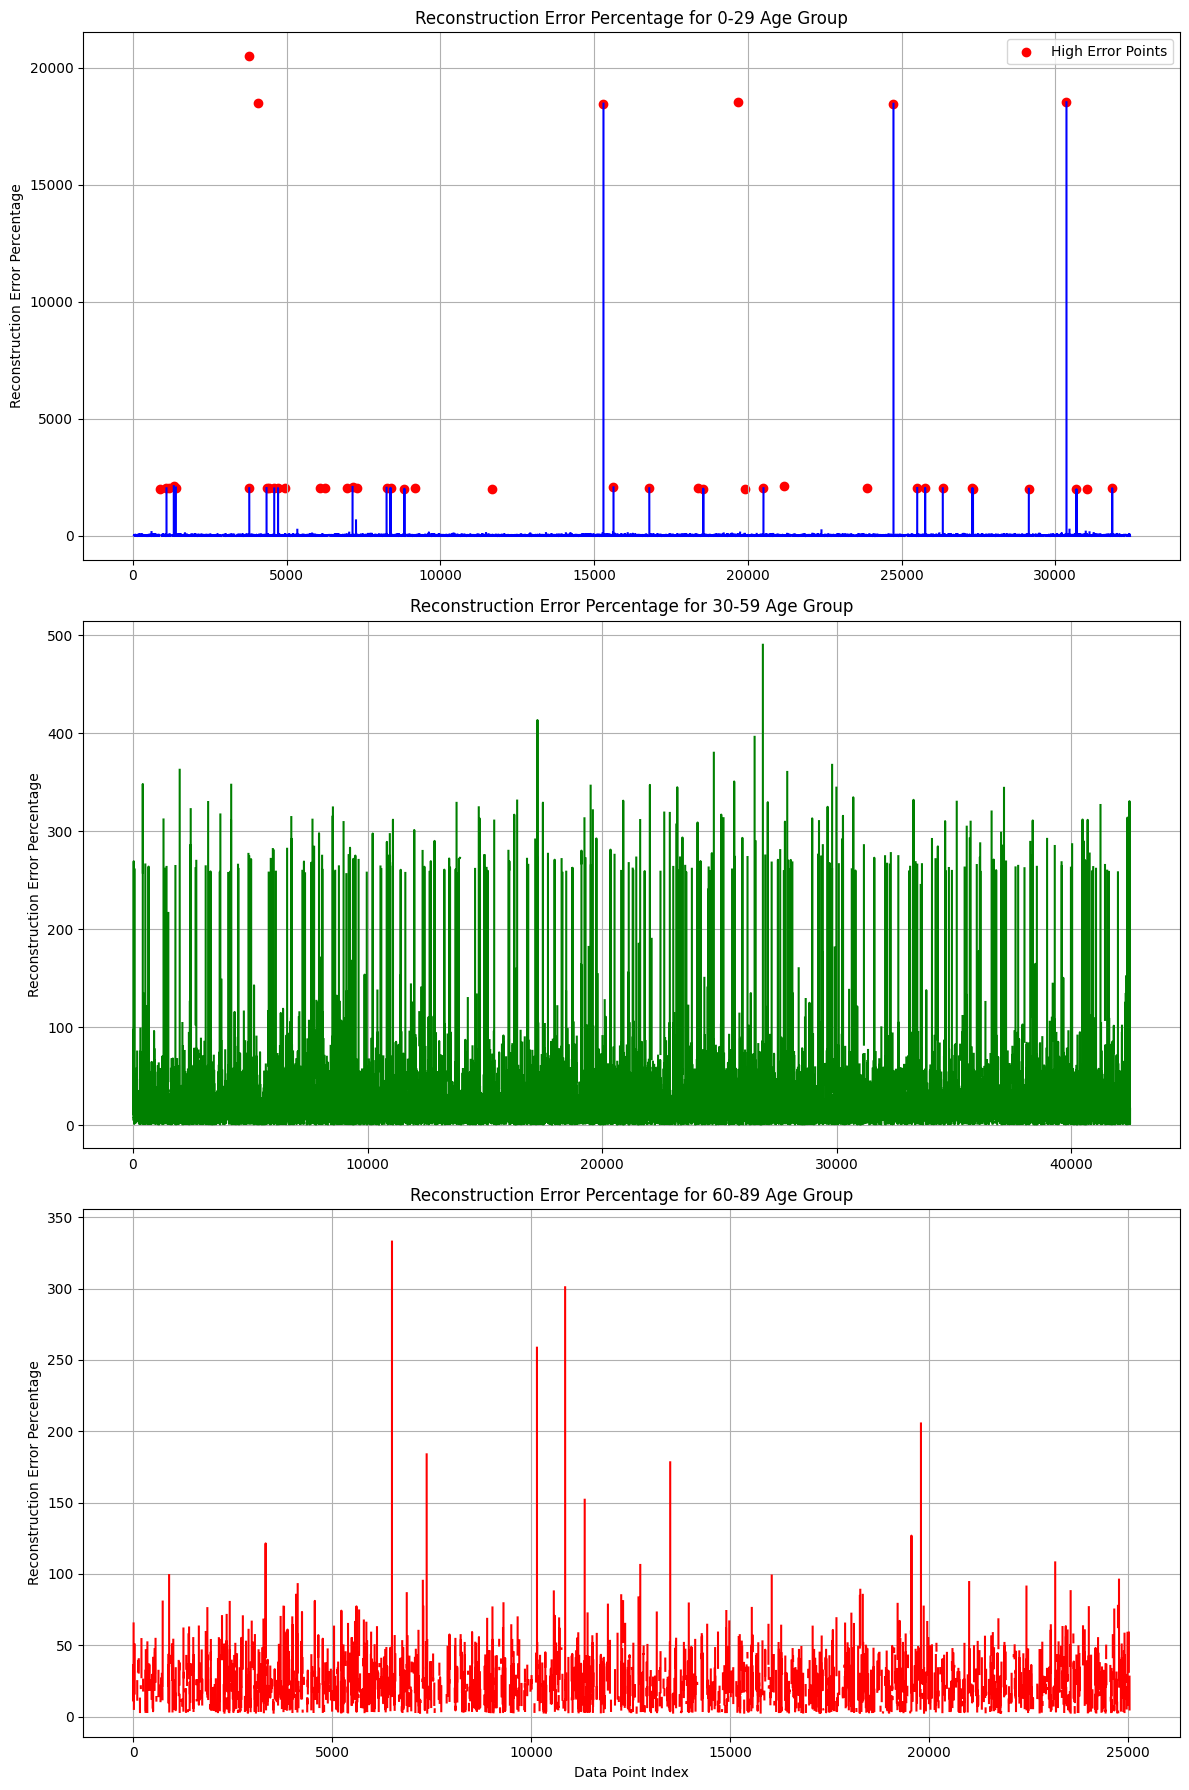

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming x_test_0_29_scaled, x_test_30_59_scaled, and x_test_60_89_scaled are already defined and normalized
# Assuming testDF_0_29 is the original DataFrame for the 0-29 age group

# Define a threshold for high reconstruction error
high_error_threshold = 1000  # Adjust this threshold as needed

# Predict the reconstruction error for the 0-29 age group
reconstructed_test_0_29 = autoencoder.predict(x_test_0_29_scaled)
reconstruction_error_0_29 = np.mean(np.square(x_test_0_29_scaled - reconstructed_test_0_29), axis=1)
reconstruction_error_percentage_0_29 = reconstruction_error_0_29 * 100
mean_reconstruction_error_percentage_0_29 = np.mean(reconstruction_error_percentage_0_29)
print(f'Mean Reconstruction Error Percentage for 0-29 age group: {mean_reconstruction_error_percentage_0_29:.2f}%')

# Track high reconstruction errors
high_error_indices_0_29 = np.where(reconstruction_error_percentage_0_29 > high_error_threshold)[0]
high_error_data_0_29 = testDF_0_29.iloc[high_error_indices_0_29]

# Predict the reconstruction error for the 30-59 age group
reconstructed_test_30_59 = autoencoder.predict(x_test_30_59_scaled)
reconstruction_error_30_59 = np.mean(np.square(x_test_30_59_scaled - reconstructed_test_30_59), axis=1)
reconstruction_error_percentage_30_59 = reconstruction_error_30_59 * 100
mean_reconstruction_error_percentage_30_59 = np.mean(reconstruction_error_percentage_30_59)
print(f'Mean Reconstruction Error Percentage for 30-59 age group: {mean_reconstruction_error_percentage_30_59:.2f}%')

# Predict the reconstruction error for the 60-89 age group
reconstructed_test_60_89 = autoencoder.predict(x_test_60_89_scaled)
reconstruction_error_60_89 = np.mean(np.square(x_test_60_89_scaled - reconstructed_test_60_89), axis=1)
reconstruction_error_percentage_60_89 = reconstruction_error_60_89 * 100
mean_reconstruction_error_percentage_60_89 = np.mean(reconstruction_error_percentage_60_89)
print(f'Mean Reconstruction Error Percentage for 60-89 age group: {mean_reconstruction_error_percentage_60_89:.2f}%')

# Plot the reconstruction error percentage for each data point as line graphs
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Plot for 0-29 age group
axes[0].plot(reconstruction_error_percentage_0_29, linestyle='-', color='b')
axes[0].set_title('Reconstruction Error Percentage for 0-29 Age Group')
axes[0].set_ylabel('Reconstruction Error Percentage')
axes[0].grid(True)

# Highlight high error points for 0-29 age group
axes[0].scatter(high_error_indices_0_29, reconstruction_error_percentage_0_29[high_error_indices_0_29], color='r', label='High Error Points')
axes[0].legend()

# Plot for 30-59 age group
axes[1].plot(reconstruction_error_percentage_30_59, linestyle='-', color='g')
axes[1].set_title('Reconstruction Error Percentage for 30-59 Age Group')
axes[1].set_ylabel('Reconstruction Error Percentage')
axes[1].grid(True)

# Plot for 60-89 age group
axes[2].plot(reconstruction_error_percentage_60_89, linestyle='-', color='r')
axes[2].set_title('Reconstruction Error Percentage for 60-89 Age Group')
axes[2].set_xlabel('Data Point Index')
axes[2].set_ylabel('Reconstruction Error Percentage')
axes[2].grid(True)

plt.tight_layout()
plt.show()

## Trying to understand why some data points in the 0-29 age range is so skewed

In [15]:
print(f'Indices with high reconstruction error for 0-29 age group: {high_error_indices_0_29}')
print("\nData points with high reconstruction errors for 0-29 age group:")
print(high_error_data_0_29)

Indices with high reconstruction error for 0-29 age group: [  893  1091  1178  1328  1397  3762  3783  4062  4345  4441  4596  4719
  4941  6094  6246  6966  7143  7300  8249  8378  8829  9189 11663 15304
 15630 16794 18372 18550 19688 19904 20508 21174 23891 24736 25509 25766
 26340 27298 27322 29139 30363 30688 31022 31850]

Data points with high reconstruction errors for 0-29 age group:
        age  hypertension  heart_disease    bmi  HbA1c_level  \
2658   22.0             1              0  16.79          5.7   
3353   28.0             1              0  42.44          5.8   
3620   26.0             1              0  20.04          7.5   
4105   28.0             1              0  55.52          6.5   
4334   29.0             1              0  35.15          3.5   
11620  25.0             1              1  37.47          5.8   
11679  28.0             1              0  41.89          6.2   
12564  19.0             0              1  40.25          6.1   
13401  25.0             1      

First few rows of the dataset with high reconstruction errors:
       age  hypertension  heart_disease    bmi  HbA1c_level  \
2658  22.0             1              0  16.79          5.7   
3353  28.0             1              0  42.44          5.8   
3620  26.0             1              0  20.04          7.5   
4105  28.0             1              0  55.52          6.5   
4334  29.0             1              0  35.15          3.5   

      blood_glucose_level  diabetes  gender_Male  gender_Other  \
2658                  145         0         True         False   
3353                  130         1        False         False   
3620                  155         1         True         False   
4105                  140         0        False         False   
4334                  158         0        False         False   

      smoking_history_current  smoking_history_ever  smoking_history_former  \
2658                    False                 False                   False   
335

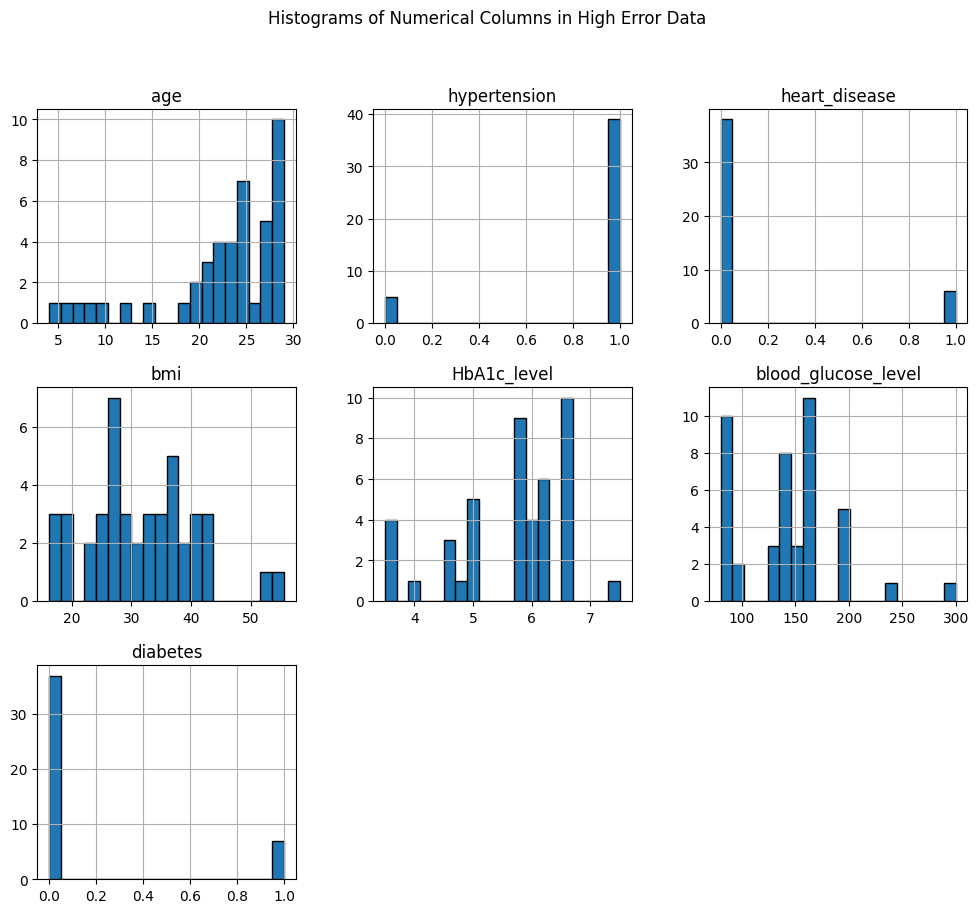

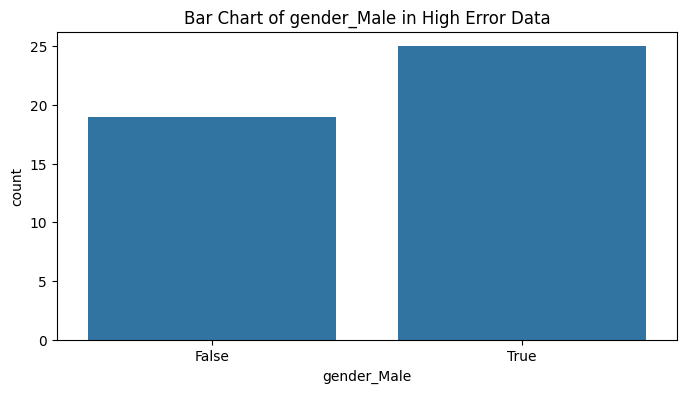

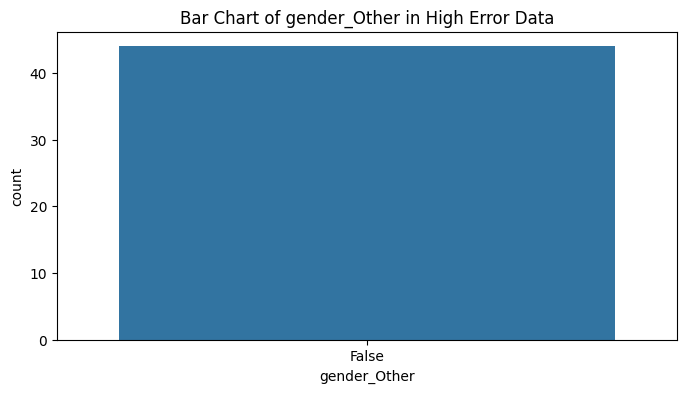

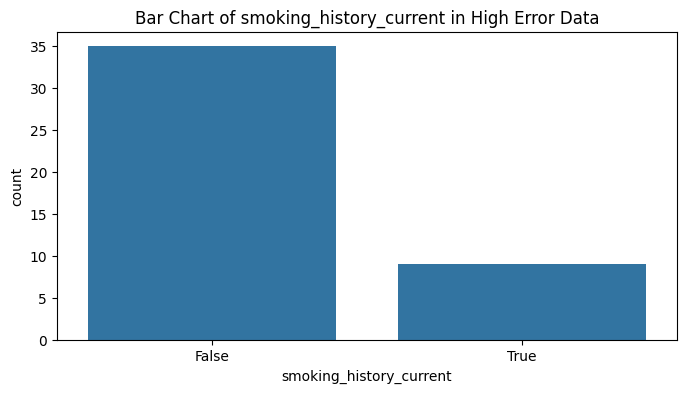

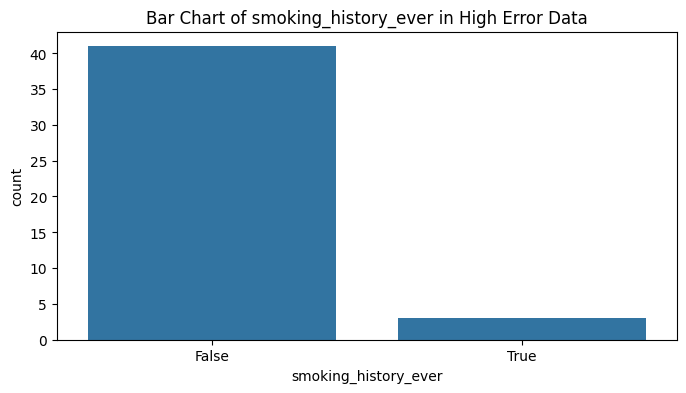

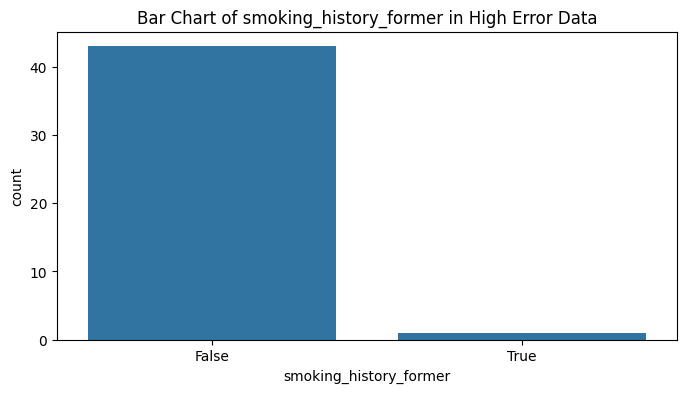

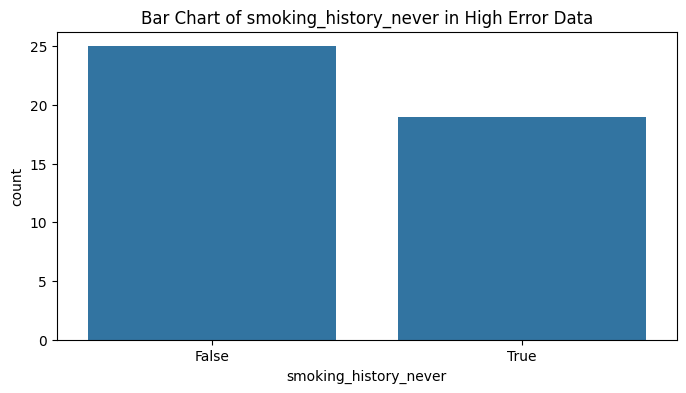

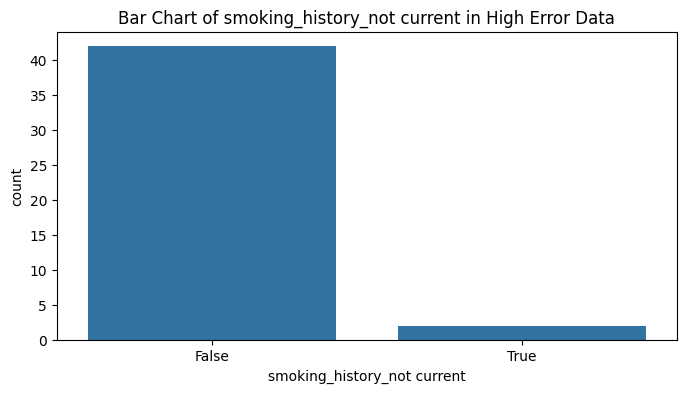

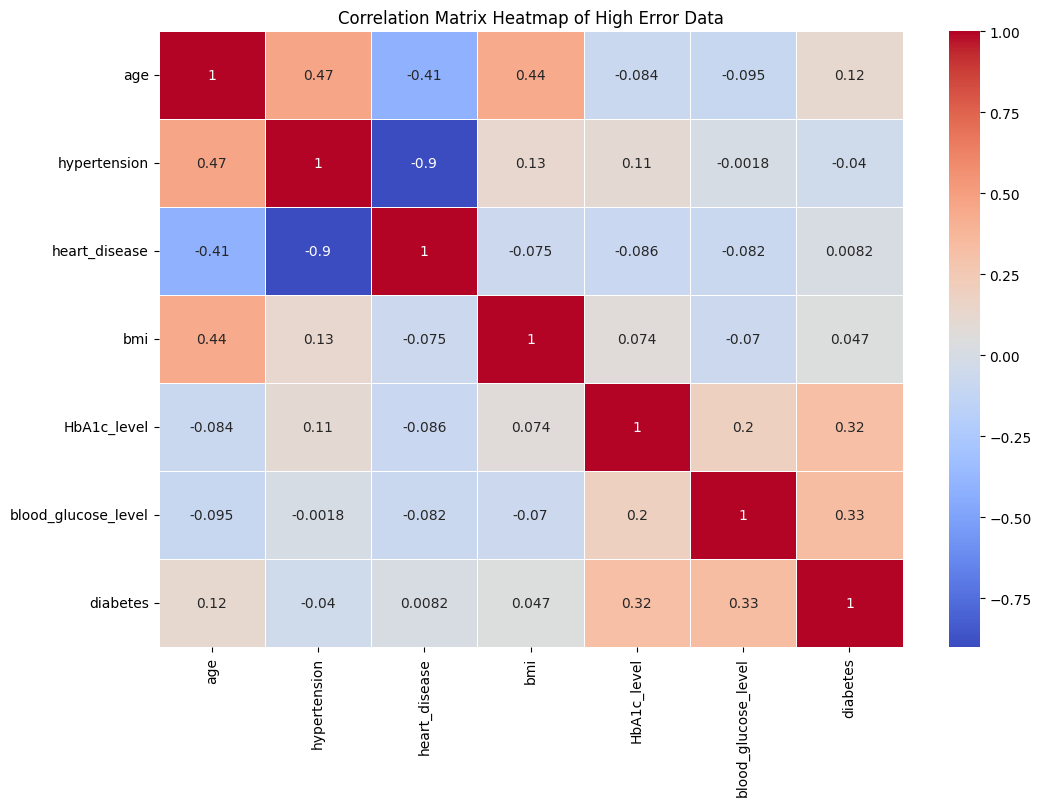

c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


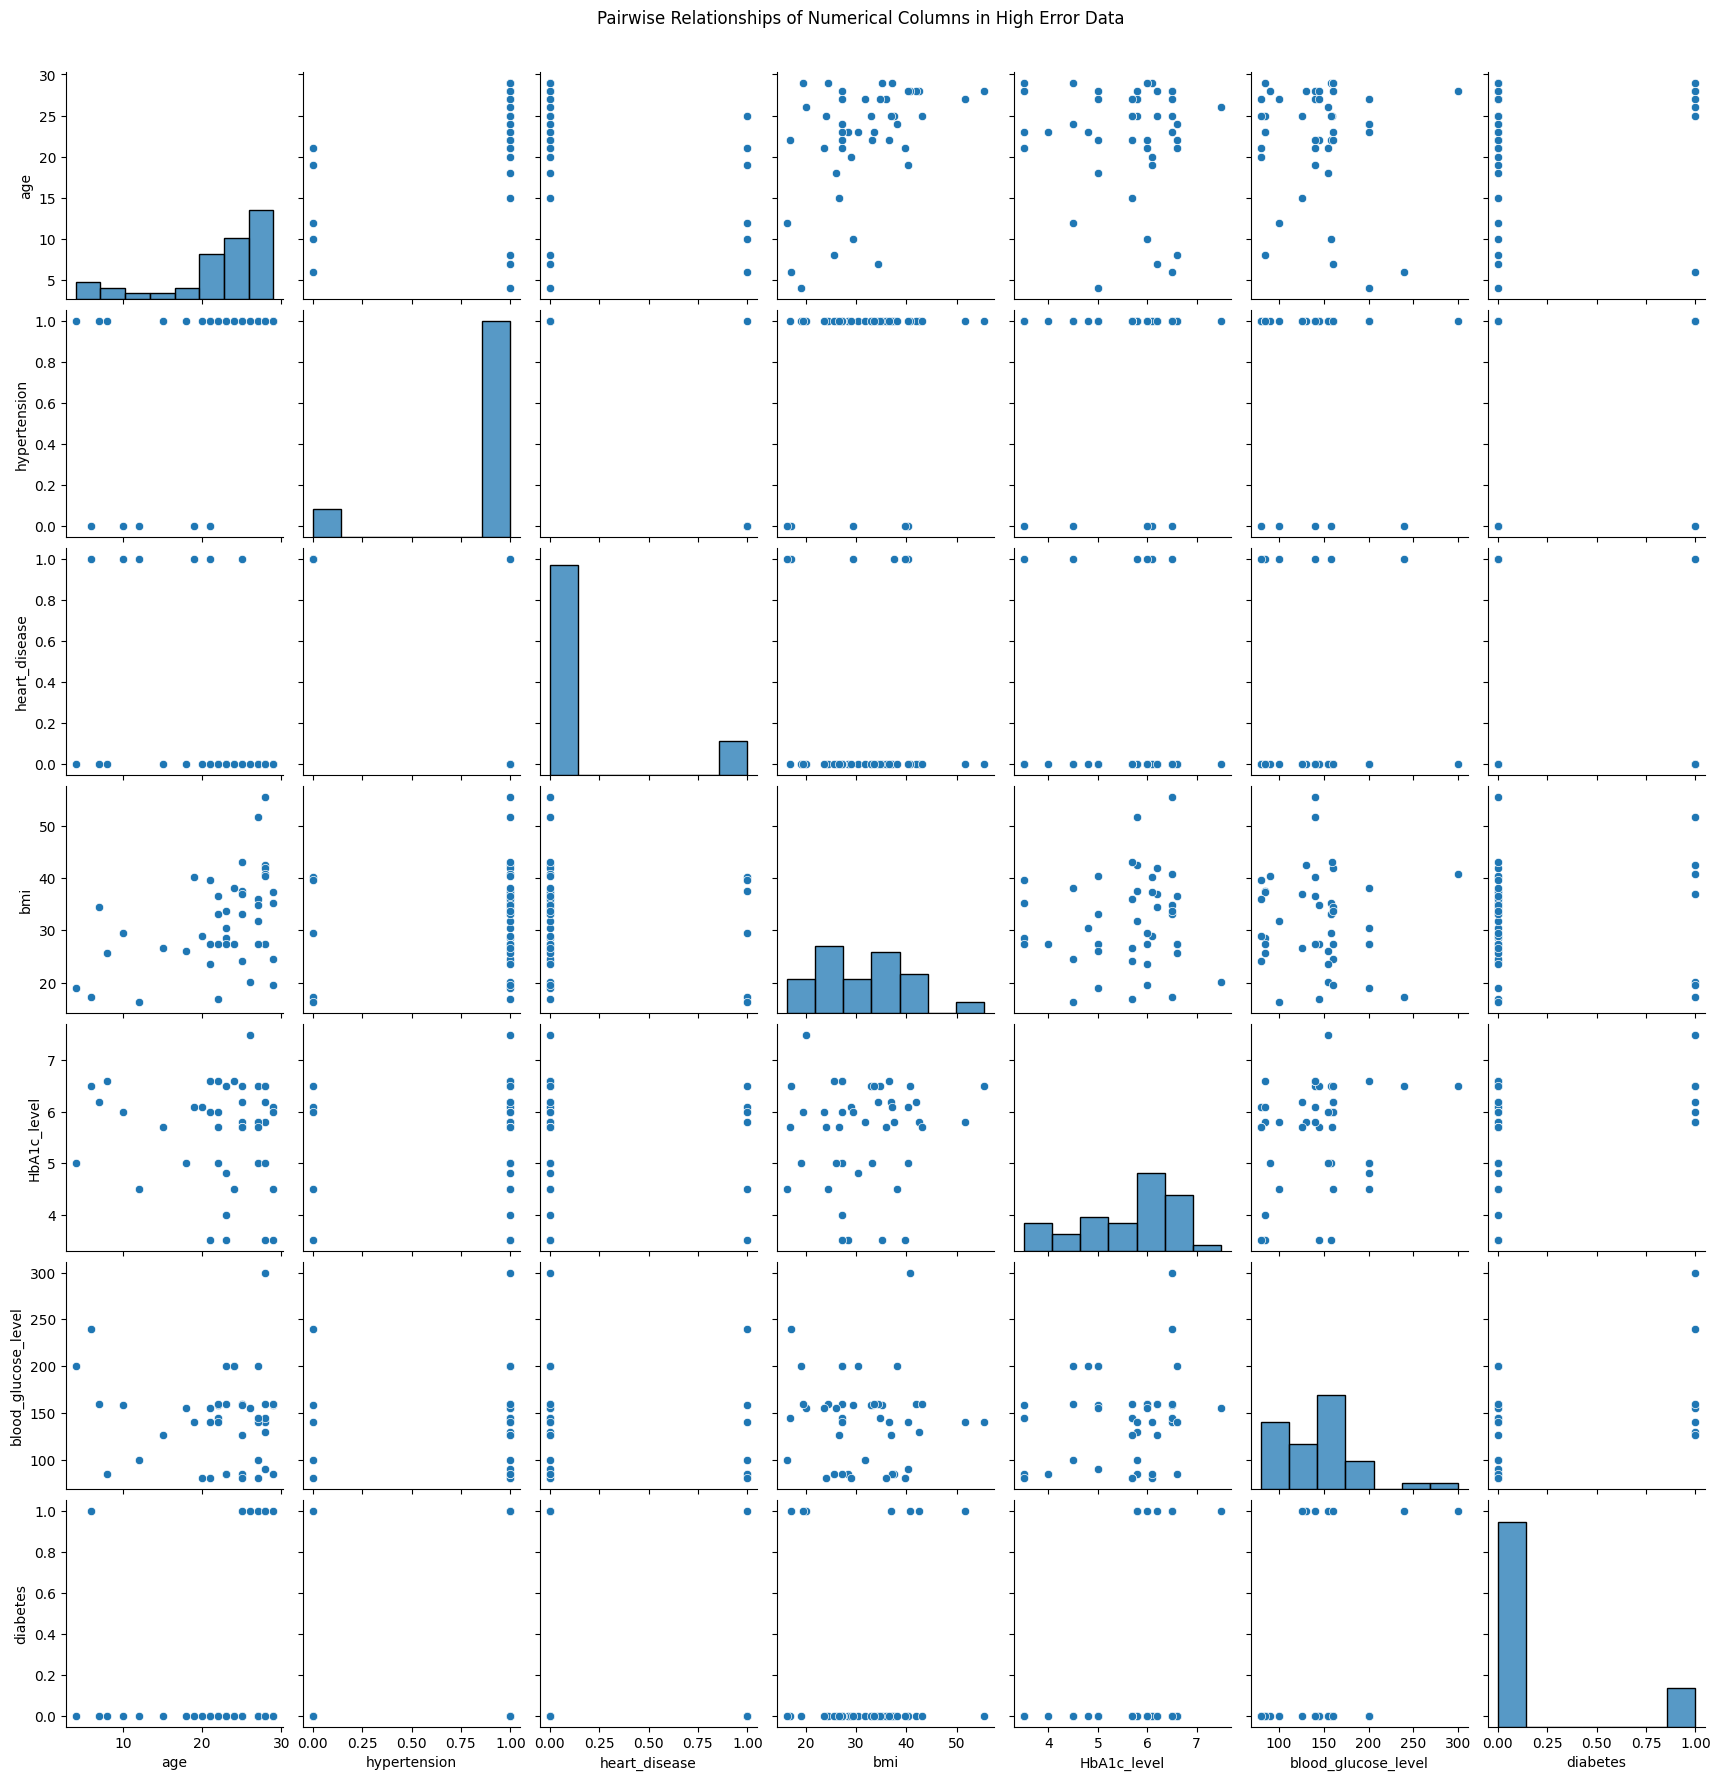

In [16]:
import seaborn as sns

# Assuming high_error_data_0_29 is already defined

# Display the first few rows of the dataset
print("First few rows of the dataset with high reconstruction errors:")
print(high_error_data_0_29.head())

# Check the data types of each column
print("\nData types of each column:")
print(high_error_data_0_29.dtypes)

# Check for missing values
print("\nMissing values in each column:")
print(high_error_data_0_29.isnull().sum())

# Descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:")
print(high_error_data_0_29.describe())

# Descriptive statistics for categorical columns
print("\nDescriptive statistics for categorical columns:")
print(high_error_data_0_29.describe(include=['object', 'bool']))

# Plot histograms for numerical columns
numerical_columns = high_error_data_0_29.select_dtypes(include=np.number).columns
high_error_data_0_29[numerical_columns].hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle('Histograms of Numerical Columns in High Error Data')
plt.show()

# Plot bar charts for categorical columns
categorical_columns = high_error_data_0_29.select_dtypes(include=['object', 'bool']).columns
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=high_error_data_0_29, x=col)
    plt.title(f'Bar Chart of {col} in High Error Data')
    plt.show()

# Calculate the correlation matrix for numerical columns
correlation_matrix = high_error_data_0_29[numerical_columns].corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap of High Error Data')
plt.show()

# Plot pairwise relationships using pair plots
sns.pairplot(high_error_data_0_29[numerical_columns])
plt.suptitle('Pairwise Relationships of Numerical Columns in High Error Data', y=1.02)
plt.show()